In [1]:
options(warn=-1, messages=-1)

In [2]:
library(rio)
library(tidyverse)
suppressMessages(library(scales))
suppressMessages(library(corrplot))
suppressMessages(library(factoextra))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.3.5     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
theme_glab = function(
    base_size=12,
    base_family="",
    base_line_size=base_size / 180,
    base_rect_size=base_size / 180
) {

    # Assign font family up front
    font = "Helvetica"

    ggplot2::theme_bw(
        base_size=base_size, 
        base_family=base_family,
        base_line_size=base_line_size
    ) %+replace%
    ggplot2::theme(
        legend.background=element_blank(),
        legend.title=element_text(
            color=rgb(100, 100, 100, maxColorValue=255),
            size=rel(0.65),
            hjust=0
        ),
        legend.text=element_text(
            color=rgb(100, 100, 100, maxColorValue=255),
            size=rel(0.65)
        ),
        legend.key.size=unit(0.8, "lines"),
        plot.title=element_text(
            color=rgb(100, 100, 100, maxColorValue=255), 
            hjust=0
        ),
        axis.title=element_text(
            color=rgb(100, 100, 100, maxColorValue=255),
            size=rel(0.65)
        ),
        axis.text=element_text(
            color=rgb(100, 100, 100, maxColorValue=255),
            size=rel(0.65)
        ),
        plot.caption=element_text(
            color=rgb(100, 100, 100, maxColorValue=255),
            size=rel(0.35),
            hjust=1
        ), 
        panel.grid.major=element_blank(),   
        panel.grid.minor=element_blank(),   
        panel.border=element_rect(
            colour=rgb(100, 100, 100, maxColorValue=255),
            fill=NA
        ),
        complete=TRUE
    )
}

In [4]:
# Load all helper functions
loaded_scripts = suppressMessages(
    sapply(list.files("../R/", full.names=TRUE), source)
)

## Setup the project's variables

Here you should change the different variables according to your project characteristics:

In [5]:
PROJECT_NAME = "ARG23"

DATA_DIR = "../data/"

ICP_FILENAME = "ARG23_dil1at10" # Without extension! (it assumes an .xlsx file)

## Load project's *env_dataset*

The *env_dataset* will be used for plotting both DIC and IC data.
However, ICP-MS data should be carefully curated (see ICP-MS section).

In [6]:
data_df = suppressMessages(
    import(
        file=file.path(
            DATA_DIR,
            paste0(PROJECT_NAME, "_env_dataset.xlsx")
        ),
        sheet="envdata_template",
        skip=1
    )
)

# Remove first row containing the units
data_df = data_df %>% slice(2:nrow(data_df))

# Convert data columns to numeric
data_df = type.convert(data_df, as.is=TRUE)

# Convert SiteID to ordered factor for plotting
data_df = data_df %>% mutate(SiteID=factor(SiteID, levels=data_df$SiteID))

data_df

ExpID,SiteID,CollectionID,site_name,series,continent,country,year,date,StrataID,⋯,DHS,DV,HF,PV,SR,slab_name,SDepth,SDip,ConvR,ConvAge
<chr>,<fct>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<lgl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
ARG23,ES,ES230304,El Sauce,1,SA,ARG,2023,45019.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,OZ,OZ230305,Olaruz,2,SA,ARG,2023,45049.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,RC1,RC1230306,Rosario de Coyaguima,3,SA,ARG,2023,45080.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,PQ,PQ230306,Pairique,4,SA,ARG,2023,45080.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,CZ,CZ230307,Coranzuli,5,SA,ARG,2023,45110.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,PI,PI230308,Pirquitas,6,SA,ARG,2023,45141.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,OY,OY230308,Orosmayo,7,SA,ARG,2023,45141.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,LF,LF230308,Lagunilla del Farallon,8,SA,ARG,2023,45141.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARG23,LV,LV230309,Laguna de Vilama,9,SA,ARG,2023,45172.0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


## DIC analysis

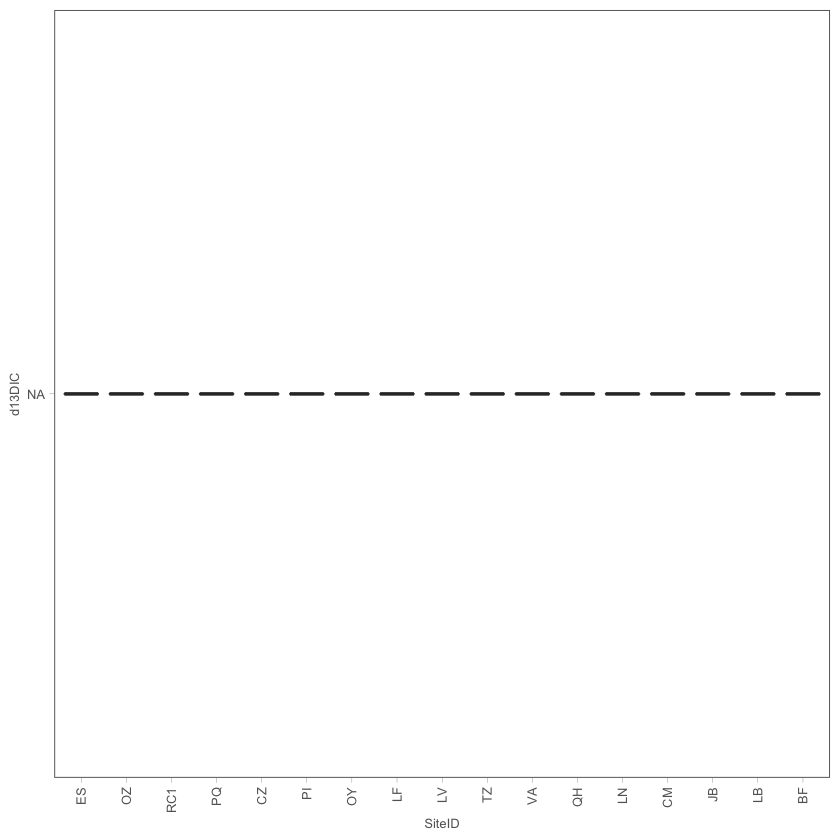

In [7]:
figure_dic = ggplot(
        data=data_df,
        aes(
            x=SiteID,
            y=d13DIC
        )
    ) +
    geom_boxplot(fill="lightgray") +
    scale_x_discrete(limits=unique(data_df$SiteID)) +
    theme_glab() +
    # Rotate X axis labels
    theme(axis.text.x=element_text(angle=90, vjust=0.5, hjust=1))

ggsave(
    plot=figure_dic,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-dic.svg")
    ),
    width=7,
    height=7
)

figure_dic

## IC analysis

In [8]:
# Perform unit conversions and calculate values for the different plots
ic_df = process_ic_data(data_df)

#### Ternary plots

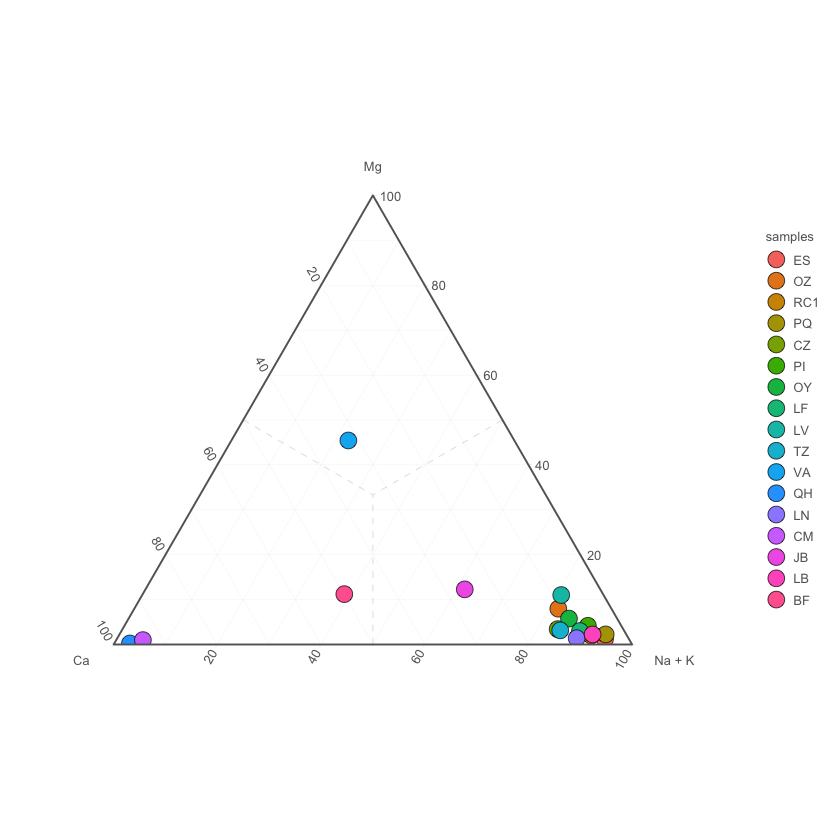

In [9]:
figure_major_cations = plot_base_major_cations() +
    geom_point(
        data=ic_df,
        aes(
            x=Ca.meq,
            y=Mg.meq,
            z=Na.meq + K.meq,
            fill=SiteID
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    ) +
    theme_glab()

ggsave(
    plot=figure_major_cations,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-major-cations.svg")
    ),
    width=7,
    height=7
)

figure_major_cations

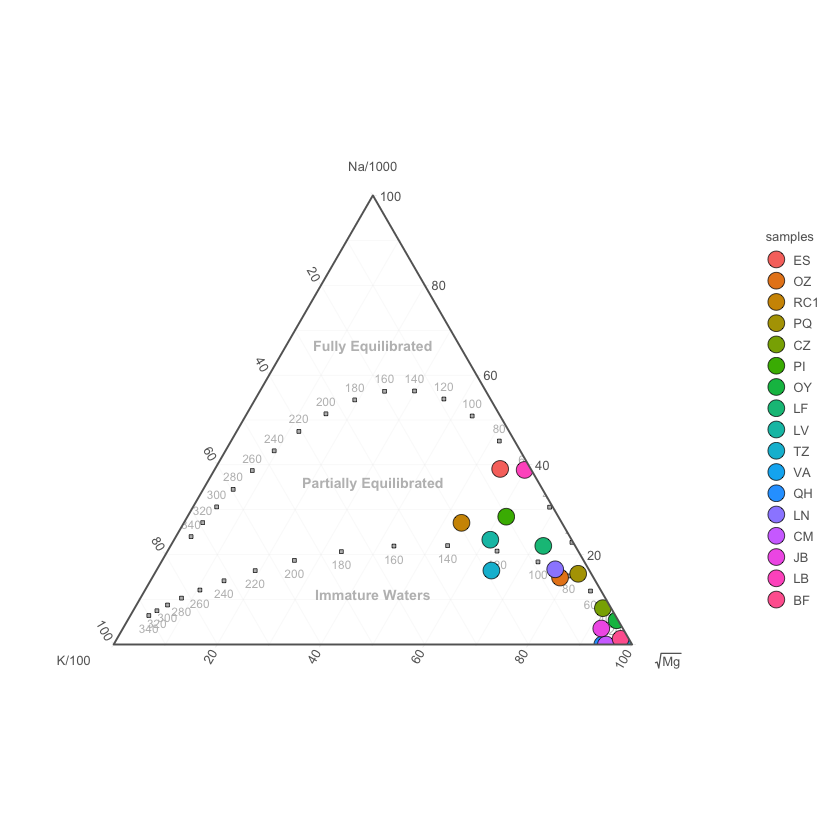

In [10]:
figure_maturity_gigg = plot_base_water_maturity(type="giggenbach") +
    geom_point(
        data=ic_df,
        aes(
            x=k/100,
            y=na/1000,
            z=sqrt(mg),
            fill=SiteID
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    ) +
    theme_glab()

ggsave(
    plot=figure_maturity_gigg,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-water-maturity-giggenbach.svg")
    ),
    width=7,
    height=7
)

figure_maturity_gigg

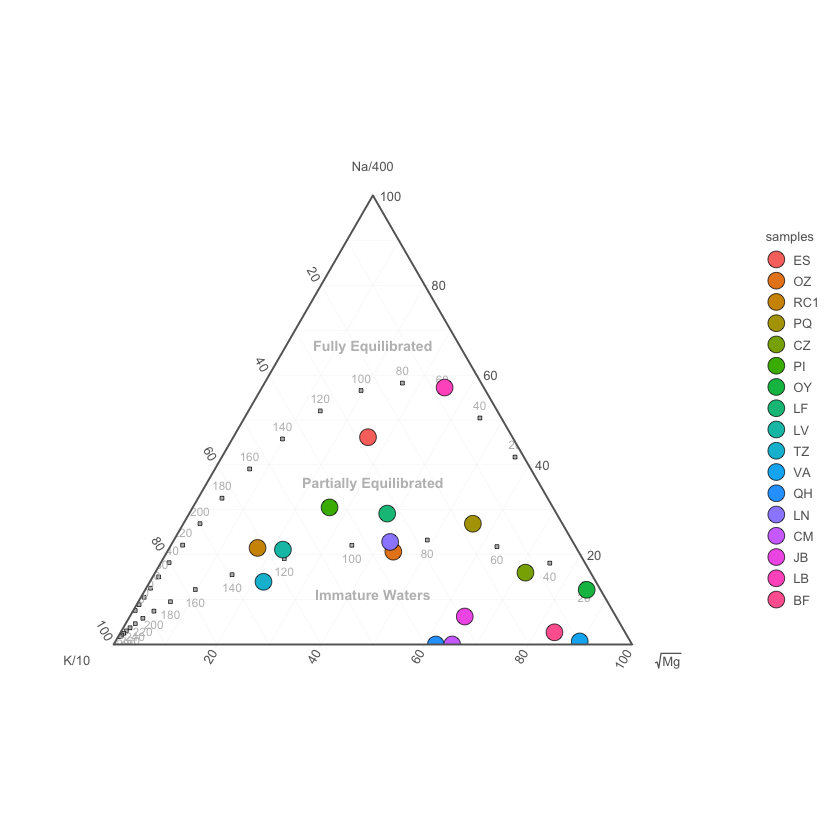

In [11]:
figure_maturity_duchi = plot_base_water_maturity(type="duchi") +
    geom_point(
        data=ic_df,
        aes(
            x=k/10,
            y=na/400,
            z=sqrt(mg),
            fill=SiteID
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    ) +
    theme_glab()

ggsave(
    plot=figure_maturity_duchi,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-water-maturity-duchi.svg")
    ),
    width=7,
    height=7
)

figure_maturity_duchi

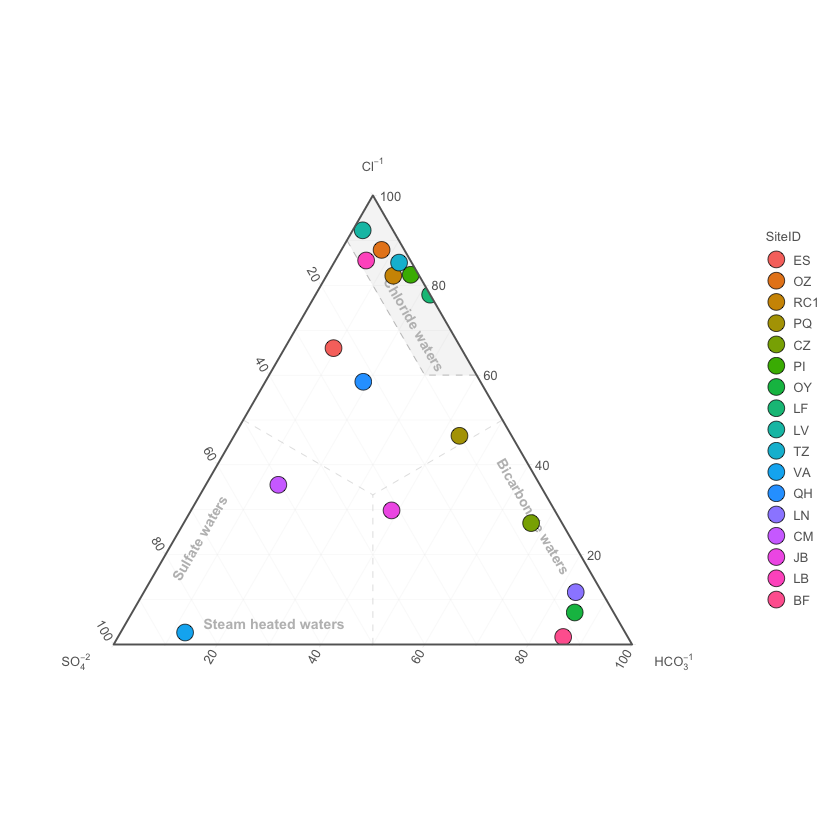

In [12]:
figure_gigg_anions = plot_base_gigg_anions() +
    geom_point(
        data=ic_df,
        aes(
            x=SO4.meq,
            y=Cl.meq,
            z=HCO3.meq,
            fill=SiteID
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    ) +
    theme_glab()

ggsave(
    plot=figure_gigg_anions,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-giggenbach-anions.svg")
    ),
    width=7,
    height=7
)

figure_gigg_anions

#### Langelier-Ludwig diagram

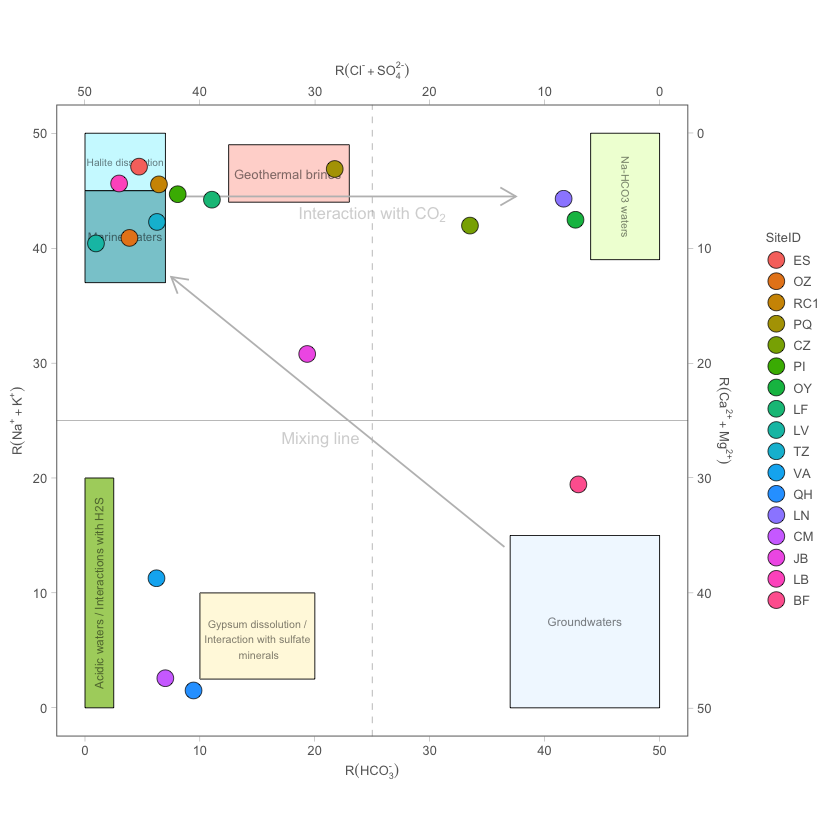

In [13]:
figure_ll = plot_base_ll() +
    geom_point(
        data=ic_df,
        aes(
            x=r_bicarb,
            y=r_na_k,
            fill=SiteID
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    )

ggsave(
    plot=figure_ll,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-langelier-ludwig.svg")
    ),
    width=7,
    height=7
)

figure_ll

#### Gibbs diagram

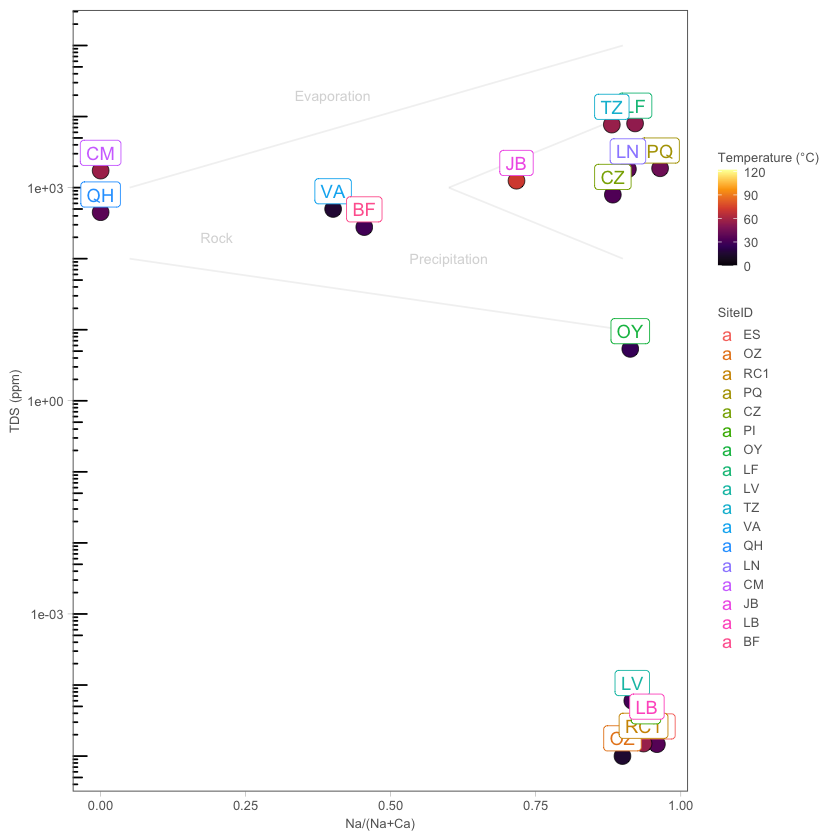

In [14]:
figure_gibbs = plot_base_gibbs() +
    geom_point(
        data=ic_df,
        aes(
            x=na/(na+ca),
            y=tds,
            fill=temp
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    ) +
    scale_fill_viridis_c(option="inferno", limits=c(0, 122)) +
    geom_label(
        data=ic_df,
        aes(
            x=na/(na+ca),
            y=tds,
            label=SiteID,
            color=SiteID
        ),
        nudge_y=0.25
    )

ggsave(
    plot=figure_gibbs,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-gibbs.svg")
    ),
    width=7,
    height=7
)

figure_gibbs

#### Piper diagram

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



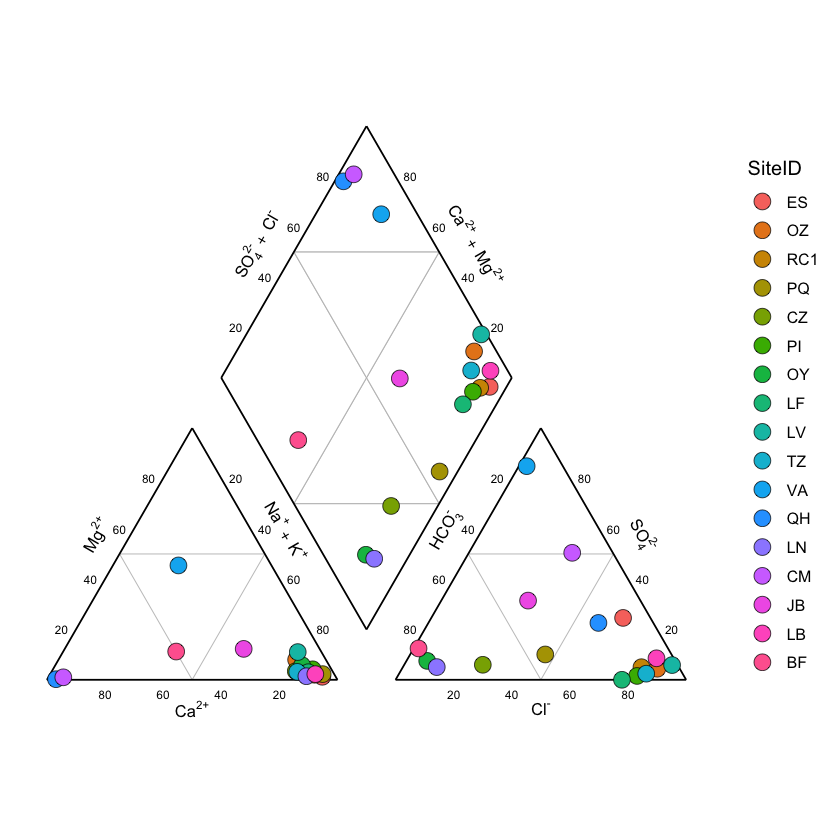

In [15]:
# Project data on the Piper plot
piper_data = transform_data_piper(
    Mg=ic_df$Mg.meq.perc,
    Ca=ic_df$Ca.meq.perc,
    Cl=ic_df$Cl.meq.perc,
    SO4=ic_df$SO4.meq.perc,
    id=ic_df$SiteID
)
piper_data = piper_data %>% rename(SiteID=id)

figure_piper = plot_base_piper() +
    geom_point(
        data=piper_data,
        aes(
            x=x,
            y=y,
            fill=SiteID
        ),
        size=4.5,
        shape=21,
        stroke=0.3
    )

ggsave(
    plot=figure_piper,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-piper.svg")
    ),
    width=7,
    height=7
)

figure_piper

## ICP-MS analysis

The raw data from the instrument must be processed for easier examination.
The selection of reasonable measurements can be performed manually or automatically.

To perform a **manual selection**: run the next chunk and examine the generated file: <code><PROJECT_NAME>_check.xlsx</code>

To perform an **automatic selection**: uncomment the following line: <code>icp_df = icp_df %>% filter(value_sd_check != "DISCARD")</code>

In [16]:
icp_df = suppressMessages(
    process_icp_data(
        file.path(
            DATA_DIR,
            PROJECT_NAME,
            "ICP-MS",
            paste0(ICP_FILENAME, ".xlsx")
        )
    )
)

write.csv(
    x=icp_df,
    file=file.path(
        DATA_DIR,
        PROJECT_NAME,
        "ICP-MS",
        paste0(ICP_FILENAME, "_check.csv")
    ),
    row.names=FALSE
)

# Discard values that didn't pass the SD check
# icp_df = icp_df %>% filter(value_sd_check != "DISCARD")

In [17]:
# Remove selected elements
icp_df = icp_df %>%
    filter(
        element != "Li",
        !(element == "Na" & gas == "No Gas"),
        element != "Mg",
        !(element == "P" & gas == "No Gas"),
        !(element == "S" & gas == "No Gas"),
        element != "K",
        element != "Ca",
        !(element == "Si" & gas == "No Gas")
    )

In [18]:
# Sort samples and put blank first
icp_blank_name = "blank"

icp_sample_order = c(
    icp_blank_name,
    icp_df %>% filter(sample != icp_blank_name) %>% pull(sample) %>% unique()
)

icp_df = icp_df %>%
    mutate(sample=factor(sample, levels=icp_sample_order))

In [19]:
selected_metals = read.csv(
        text="element,color
            Fe,#f57900
            V,#4e9a06
            Mn,#563566
            Co,#204a87
            Ni,#555753
            Cu,#8ae234
            Zn,#babdb6
            Se,#edd400
            Mo,#a40000
            W,#8f5902"
    ) %>%
    # Replace indentation whitespaces
    mutate(
        element=str_replace(
            string=element,
            pattern="\\s+",
            replacement=""
        )
    )

# Create a named vector
selected_metals = selected_metals %>% deframe()

icp_df_selected = icp_df %>%
    filter(element %in% names(selected_metals))

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

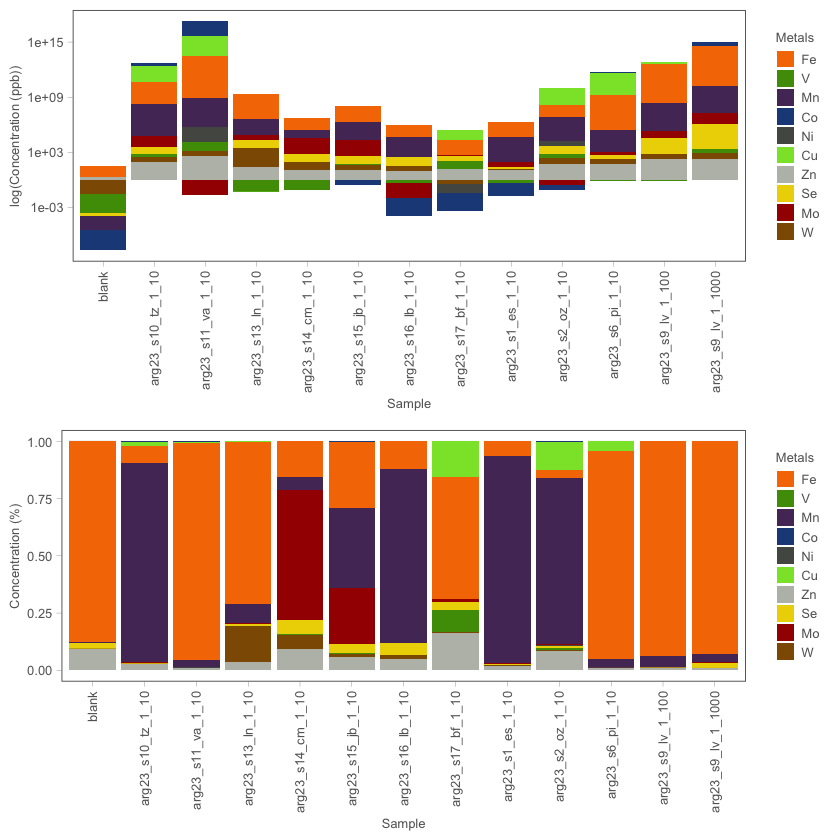

In [20]:
figure_metals = plot_metals(icp_df_selected, log_y=TRUE)

ggsave(
    plot=figure_metals,
    filename=file.path(
        "../figures",
        paste0(PROJECT_NAME, "-metals.svg")
    ),
    width=7,
    height=7
)

figure_metals

The next chunk of code saves the data in wide format, ready to be copied into the <code>env_dataset</code>:

In [21]:
# Save processed ICP-MS data in wide format
icp_df_wide = icp_df %>%
    ungroup() %>%
    select(sample, element, isotope, dilution, gas, concentration) %>%
    pivot_wider(
        id_cols=c(
            sample,
            dilution,
            gas
        ),
        names_from=c(
            isotope,
            element
        ),
        names_sep="_",
        values_from=concentration
    )

write.csv(
    x=icp_df_wide,
    file=file.path(
        DATA_DIR,
        PROJECT_NAME,
        "ICP-MS",
        paste0(ICP_FILENAME, "_envdata.csv")
    ),
    row.names=FALSE
)

## Correlation and dimensionality reduction

In [22]:
feature_cols = c(
    "latitude",
    "longitude",
    "elevation",
    "temp",
    "ph",
    "orp",
    "do",
    "do_sat",
    "spc",
    "tds",
    "sio2",
    "alk_tot",
    "cl",
    "br",
    "no3",
    "so4",
    "na",
    "nh4",
    "k",
    "mg",
    "ca",
    "sulfide",
    "fe2",
    "v",
    "mn",
    "fe",
    "ni",
    "cu",
    "mo",
    "w"
)

features_df = data_df %>%
    # Get numerical features
    select(feature_cols) %>%
    # Replace below detection limit values
    mutate(across(everything(), ~as.numeric(.x))) %>%
    # Fill NA with zeroes
    mutate(across(everything(), ~replace_na(.x, 0)))

# Get the correlation matrix
corr_matrix = cor(as.matrix(features_df))

corr_matrix

,latitude,longitude,elevation,temp,ph,orp,do,do_sat,spc,tds,⋯,ca,sulfide,fe2,v,mn,fe,ni,cu,mo,w
latitude,1.000000000,-0.041707872,0.49458996,0.023519944,-0.18877233,-0.2252368047,0.240723360,0.60142881,0.33918695,0.09394084,⋯,0.341715193,-0.002000125,0.34198990,-0.34316001,0.05506923,0.22506549,-0.120458876,0.17816789,-0.330682343,-0.55851220
longitude,-0.041707872,1.000000000,-0.84803044,0.431572398,0.17287224,-0.0586227138,0.390751019,-0.24698568,-0.14019317,-0.17326404,⋯,-0.194359142,0.436830532,-0.32712754,0.03181285,-0.11662299,-0.25467707,-0.008069792,-0.23946293,0.362063304,-0.24354259
elevation,0.494589963,-0.848030437,1.00000000,-0.390691664,-0.38994752,0.0334213509,-0.251486493,0.43501673,0.22379654,0.20710096,⋯,0.276830084,-0.344207659,0.40553000,-0.06874740,0.23409550,0.26656754,0.111827771,0.40434474,-0.502051740,-0.08459008
temp,0.023519944,0.431572398,-0.39069166,1.000000000,0.26173570,-0.1872165615,-0.095813279,-0.02408239,-0.06530890,0.42573426,⋯,-0.084587537,0.301285003,-0.25016637,-0.46196216,-0.52456450,-0.14157219,-0.463574608,-0.42851776,0.472889939,0.02122235
ph,-0.188772332,0.172872243,-0.38994752,0.261735703,1.00000000,-0.2074774495,0.238481462,0.16097460,-0.34456927,-0.08414592,⋯,-0.346173322,-0.122975942,-0.28874076,-0.33001527,-0.76210622,-0.20682242,-0.718190228,-0.55119301,0.582198679,-0.02379986
orp,-0.225236805,-0.058622714,0.03342135,-0.187216562,-0.20747745,1.0000000000,0.226434723,0.16456821,-0.27420351,0.12781284,⋯,-0.158270574,-0.601814354,-0.04863066,0.52946254,0.38047652,-0.02837057,0.447414315,0.31126153,0.411281297,-0.07787137
do,0.240723360,0.390751019,-0.25148649,-0.095813279,0.23848146,0.2264347227,1.000000000,0.63552618,-0.23010317,-0.07863282,⋯,-0.175820496,-0.320525845,-0.13897249,0.22794176,-0.19572537,-0.12444180,-0.185532265,-0.09694979,0.002304747,-0.31720052
do_sat,0.601428813,-0.246985685,0.43501673,-0.024082387,0.16097460,0.1645682101,0.635526184,1.00000000,0.04416378,0.23652203,⋯,0.127586914,-0.503244801,0.16352725,-0.09277066,-0.24488705,0.13137624,-0.364916273,0.01951780,-0.122557213,-0.41638111
spc,0.339186947,-0.140193168,0.22379654,-0.065308898,-0.34456927,-0.2742035122,-0.230103172,0.04416378,1.00000000,-0.18936338,⋯,0.983730858,0.285062735,0.76037289,-0.20291452,0.39802065,0.82620791,0.010370028,0.12737444,-0.310057760,-0.16687083
tds,0.093940838,-0.173264045,0.20710096,0.425734262,-0.08414592,0.1278128391,-0.078632822,0.23652203,-0.18936338,1.00000000,⋯,-0.124794952,-0.148852095,-0.19884814,-0.14795115,-0.27660010,-0.13357760,-0.189540671,-0.13262951,0.032259009,0.17671523


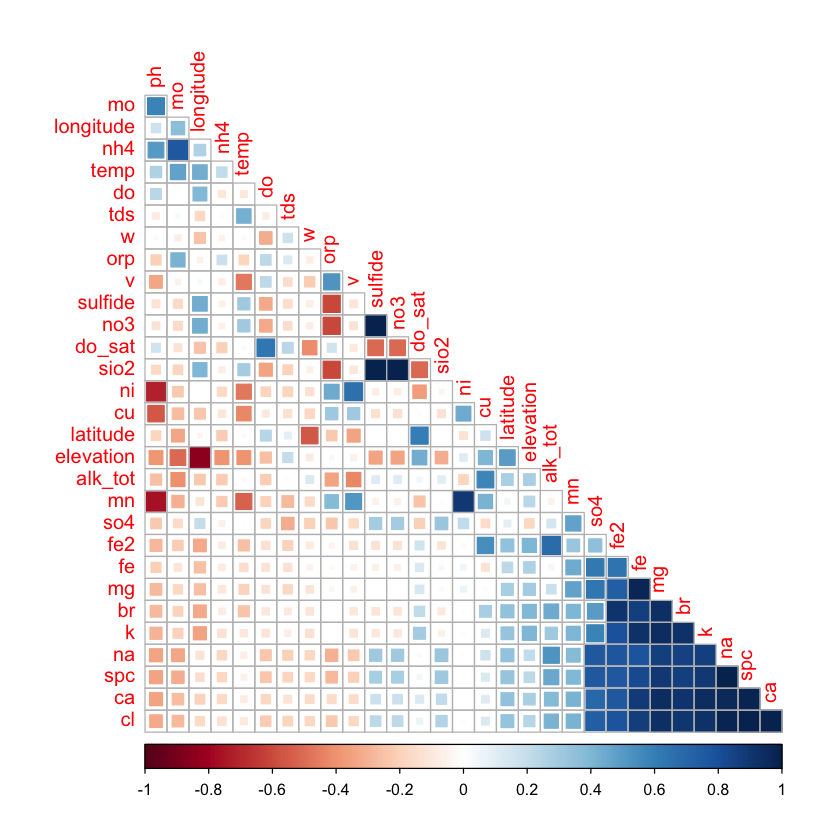

In [23]:
corrplot(
    corr_matrix,
    method="square",
    order="FPC",
    type="lower",
    insig="blank",
    diag=FALSE
)

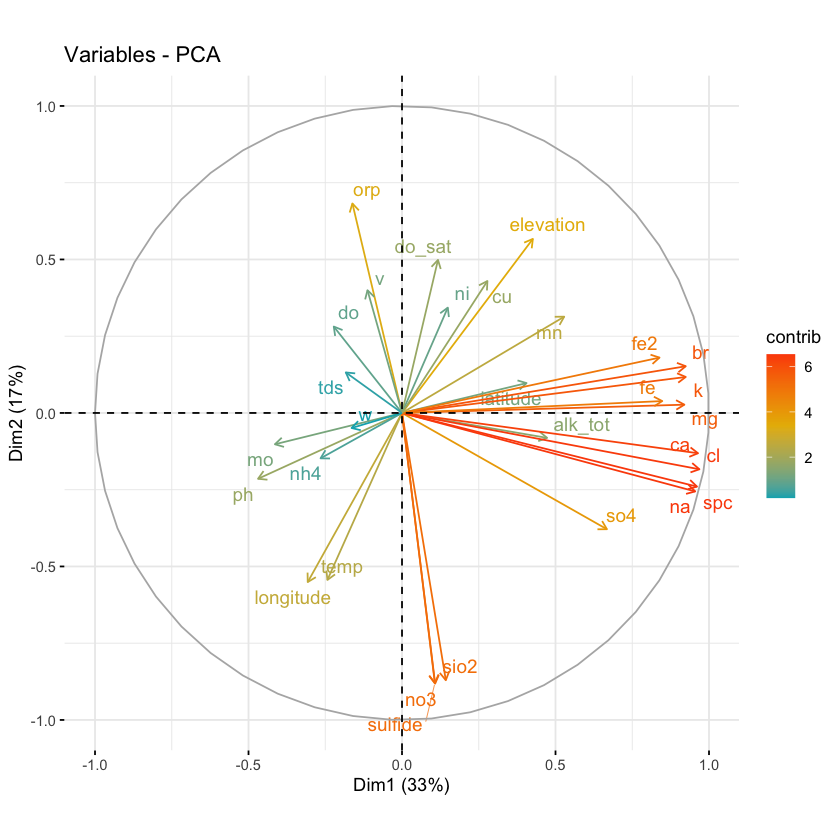

In [24]:
pca_result = prcomp(features_df, scale = TRUE)

fviz_pca_var(
    pca_result,
    col.var="contrib", # Color by contributions to the PC
    gradient.cols=c("#00AFBB", "#E7B800", "#FC4E07"),
    repel=TRUE # Avoid text overlapping
)

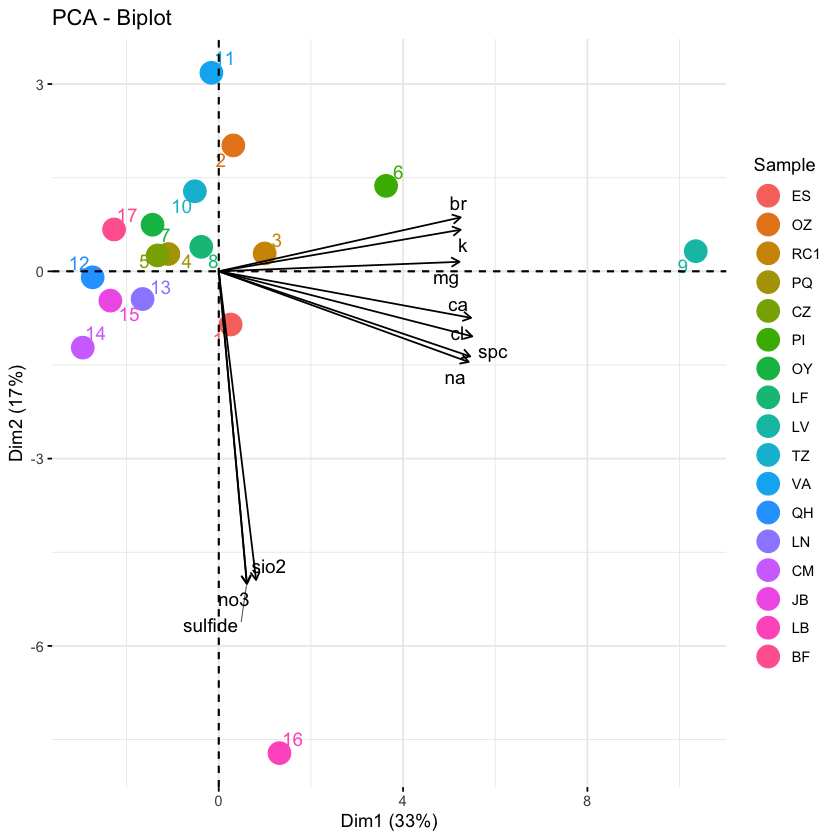

In [25]:
fviz_pca_biplot(
    pca_result,
    col.ind=data_df$SiteID,    
    select.var=list(cos2=10),
    pointsize=3,
    pointshape=21,
    fill.ind=data_df$SiteID,
    col.var="black",
    repel=TRUE,
    legend.title="Sample"
)